# Cargar las bibliotecas necesarias


In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Leer los datos desde el archivo CSV


In [3]:
df <- read.csv("cleaned_final_test.csv")


# Verificar la estructura y los primeros registros del DataFrame


In [4]:
str(df)
head(df)

'data.frame':	109605 obs. of  5 variables:
 $ weight    : int  62 59 61 65 62 50 51 54 53 63 ...
 $ age       : num  28 36 34 27 45 27 33 26 32 30 ...
 $ height    : num  173 168 165 175 173 ...
 $ size      : int  3 0 1 0 1 2 5 1 2 6 ...
 $ size_label: chr  "XL" "L" "M" "L" ...


,weight,age,height,size,size_label
,<int>,<dbl>,<dbl>,<int>,<chr>
1,62,28,172.72,3,XL
2,59,36,167.64,0,L
3,61,34,165.10,1,M
4,65,27,175.26,0,L
5,62,45,172.72,1,M
6,50,27,160.02,2,S


# Asegurar que la columna 'size_label' sea un factor para su uso en análisis


In [5]:
df$size_label <- factor(df$size_label, levels = c('XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL'))


# Realizar un análisis de varianza (ANOVA) para evaluar diferencias significativas
# en el peso (weight) según las etiquetas de talla (size_label)

In [6]:
anova_result <- aov(weight ~ size_label, data = df)
print(summary(anova_result))  # Mostrar el resumen del ANOVA

                Df  Sum Sq Mean Sq F value Pr(>F)    
size_label       6 4830864  805144   37010 <2e-16 ***
Residuals   109598 2384257      22                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Realizar la prueba post hoc de Tukey para comparar pares de medias


In [7]:
tukey_result <- TukeyHSD(anova_result)
print(tukey_result)  # Mostrar los resultados del análisis de Tukey

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ size_label, data = df)

$size_label
               diff        lwr       upr     p adj
S-XXS     3.6100715  3.4415963  3.778547 0.0000000
M-XXS     7.7307793  7.5692349  7.892324 0.0000000
L-XXS    11.8568596 11.6811580 12.032561 0.0000000
XL-XXS   15.1691355 14.9956747 15.342596 0.0000000
XXL-XXS  16.1458487 14.4077241 17.883973 0.0000000
XXXL-XXS 22.0287153 21.8519848 22.205446 0.0000000
M-S       4.1207078  3.9957506  4.245665 0.0000000
L-S       8.2467881  8.1039989  8.389577 0.0000000
XL-S     11.5590640 11.4190414 11.699087 0.0000000
XXL-S    12.5357772 10.8006706 14.270884 0.0000000
XXXL-S   18.4186438 18.2745905 18.562697 0.0000000
L-M       4.1260803  3.9915386  4.260622 0.0000000
XL-M      7.4383561  7.3067543  7.569958 0.0000000
XXL-M     8.4150694  6.6806220 10.149517 0.0000000
XXXL-M   14.2979359 14.1620535 14.433818 0.0000000
XL-L      3.3122759  3.1636371  3.460915 0.0

# Crear un gráfico de cajas para visualizar la distribución del peso por etiqueta de talla



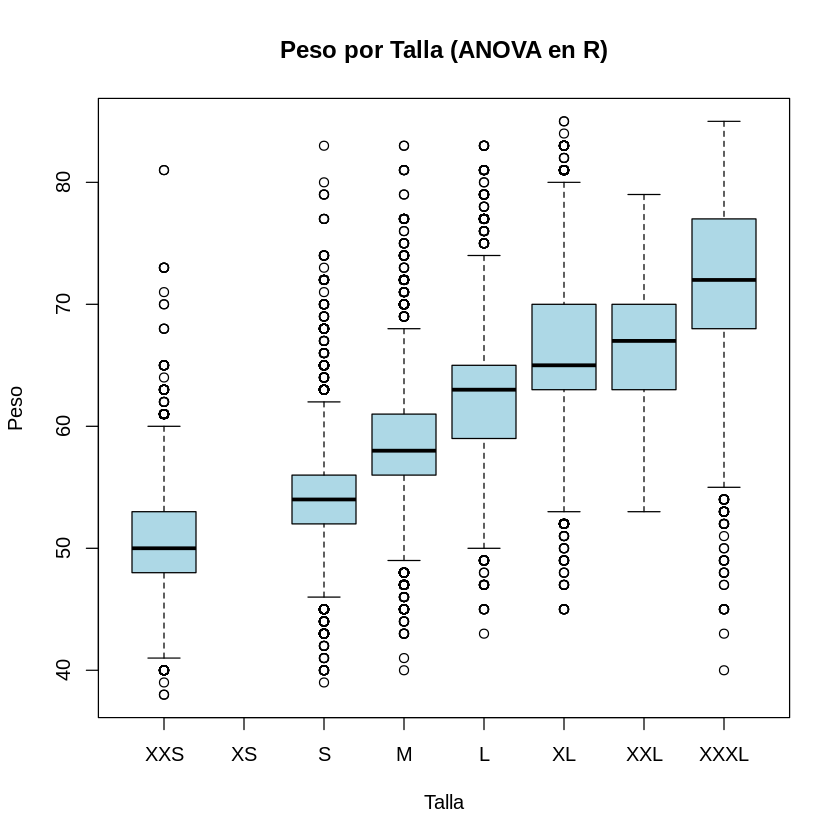

In [12]:
boxplot(weight ~ size_label, data = df,
        xlab = "Talla", ylab = "Peso",
        main = "Peso por Talla (ANOVA en R)",
        col = "lightblue")

# Crear un gráfico de densidad para mostrar la distribución del peso según la etiqueta de talla


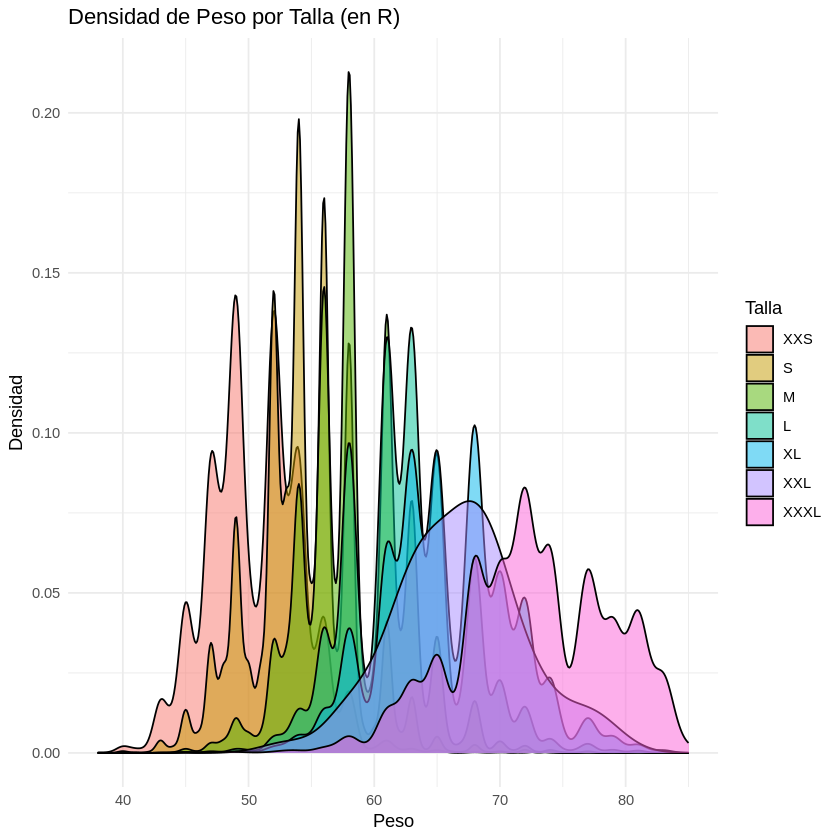

In [13]:
density_plot <- ggplot(df, aes(x = weight, fill = size_label)) +
  geom_density(alpha = 0.5) +
  labs(title = "Densidad de Peso por Talla (en R)",
       x = "Peso", y = "Densidad", fill = "Talla") +
  theme_minimal()

print(density_plot)


## Conclusiones

#Relación entre Talla y Peso:

Existe una relación muy marcada entre la talla y el peso de las personas en el conjunto de datos. Las personas con tallas más grandes tienden a tener un peso promedio significativamente mayor que aquellas con tallas más pequeñas.

#Diferencias Notables entre Grupos:

Prácticamente todas las tallas muestran diferencias significativas en el peso promedio, lo que valida que el sistema de tallas está bien estructurado para diferenciar grupos de usuarios en términos de peso.
Sin embargo, las tallas más cercanas en el rango superior (como XL y XXL) presentan diferencias menos marcadas, indicando que los usuarios en estas tallas podrían tener pesos más similares.

#Incremento Progresivo del Peso:

A medida que se avanza de las tallas más pequeñas (XXS) a las más grandes (XXXL), el peso promedio aumenta de forma consistente, con incrementos significativos entre cada nivel. Por ejemplo, la diferencia promedio entre XXS y XXXL es de aproximadamente 22 kg, reflejando un claro gradiente en el peso asociado a las tallas.

#Consistencia en el Diseño de las Tallas:

Las diferencias observadas entre tallas adyacentes, especialmente en el rango de las tallas intermedias como S, M, y L, sugieren que el sistema de tallas sigue una lógica predecible y consistente.
Aplicaciones Prácticas:

Estos resultados refuerzan la utilidad de las tallas como una herramienta para clasificar grupos de usuarios según su peso. Esto puede ser útil para diseñar ropa o productos específicos para cada grupo de tallas.
La falta de diferencias significativas entre ciertas tallas superiores como XL y XXL podría sugerir que estas tallas están menos diferenciadas en términos de peso y tal vez podrían revisarse para lograr mayor precisión.

#Resumen:
En términos simples, podemos decir que las tallas en este análisis están estrechamente relacionadas con el peso de las personas. Las diferencias de peso entre las tallas son significativas y reflejan un sistema de clasificación bien diseñado. Esto asegura que cada talla agrupa a personas con pesos similares, lo cual es esencial para aplicaciones prácticas como la industria de la moda o la salud. Sin embargo, algunas tallas más grandes son menos distintas entre sí, lo que podría optimizarse para mayor exactitud.